FWU3 parquet files converted to csv files in 6 portions then merged and plotted

In [4]:
import os

# List all files in the current directory
files = os.listdir()
print(files)


['co2_exl_pikl_00', 'Brief_Lit_Review', 'FWU3_nb.ipynb', 'FWU3_all.csv', 'df_access.ipynb', 'excel_pull.ipynb', 'csv_merge.ipynb', 'co2_exl_pikl_01', 'co2_exl_pikl', 'filter_exl.json', '.gitignore', 'output', 'Capstone_CO2.ipynb', 'filter_exl_01.json', 'pyxl_pip.ipynb', 'Farnsworth_VSCode.xlsx']


  network channel station                                             data  \
0      ZZ     HHE    FWU3  [ -2718   -384  -1595 ...  11287 -15821  -3071]   
1      ZZ     HHE    FWU3        [ 1313  1352  1389 ... -1601   130  1031]   
2      ZZ     HHE    FWU3        [-7410 -5221  3344 ... -3956  4921 11622]   
3      ZZ     HHE    FWU3  [-11938  -1006  11098 ...   -350   -485   -682]   
4      ZZ     HHE    FWU3        [-6507 -5165 -3379 ...  -315    59  -251]   

                      endtime            starttime  sampling_rate  location  
0  2019-12-26T23:59:59.996000  2019-12-26T00:00:00          250.0        10  
1  2019-11-02T23:59:59.996000  2019-11-02T00:00:00          250.0        10  
2  2019-12-22T23:59:59.996000  2019-12-22T00:00:00          250.0        10  
3  2019-12-15T23:59:59.996000  2019-12-15T00:00:00          250.0        10  
4  2019-11-28T23:59:59.996000  2019-11-28T00:00:00          250.0        10  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 

/tmp/ipykernel_36256/376436302.py:21: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  df['data'] = df['data'].apply(lambda x: np.fromstring(x.strip('[]'), dtype=float, sep=' '))


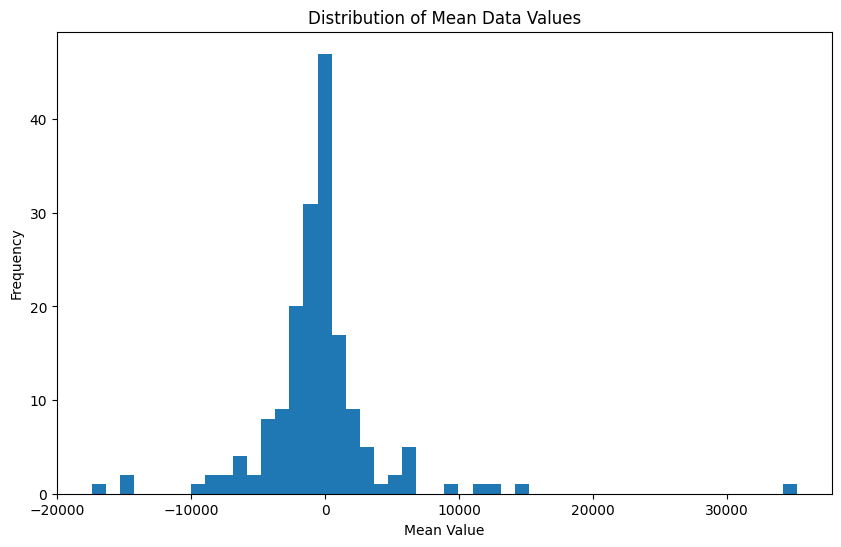

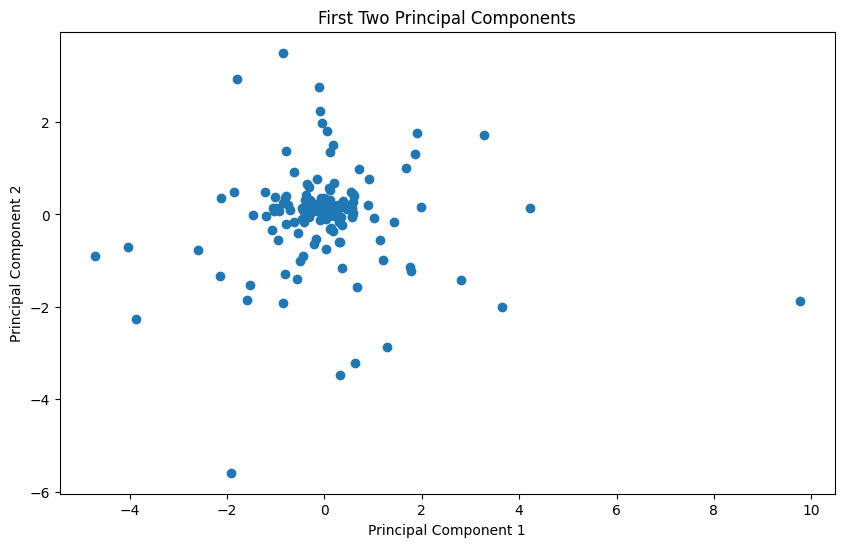

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import signal

# Load the CSV file
df = pd.read_csv('FWU3_all.csv')

# Display the first few rows of the dataframe
print(df.head())

# Get information about the dataframe
print(df.info())

# Describe the dataframe
print(df.describe())

# Convert the 'data' column to numeric values
df['data'] = df['data'].apply(lambda x: np.fromstring(x.strip('[]'), dtype=float, sep=' '))

# Create a new dataframe with the mean of each 'data' array
df_mean_data = df[['network', 'channel', 'station', 'location', 'starttime', 'endtime', 'sampling_rate']].copy()
df_mean_data['mean_data'] = df['data'].apply(np.mean)

# Display the first few rows of the new dataframe
print(df_mean_data.head())

# Plot the distribution of mean data values
plt.figure(figsize=(10, 6))
plt.hist(df_mean_data['mean_data'], bins=50)
plt.title('Distribution of Mean Data Values')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

# Perform PCA on the data arrays
pca = PCA(n_components=2)
scaler = StandardScaler()

# Scale the data
scaled_data = scaler.fit_transform(df['data'].tolist())

# Apply PCA
principal_components = pca.fit_transform(scaled_data)

# Add the principal components to the dataframe
df_pca = pd.DataFrame({'PC1': principal_components[:, 0], 'PC2': principal_components[:, 1]})

# Combine the original dataframe with PCA results
result_df = pd.concat([df_mean_data, df_pca], axis=1)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(result_df['PC1'], result_df['PC2'])
plt.title('First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Save the processed dataframe
result_df.to_csv('FWU3_processed.csv', index=False)

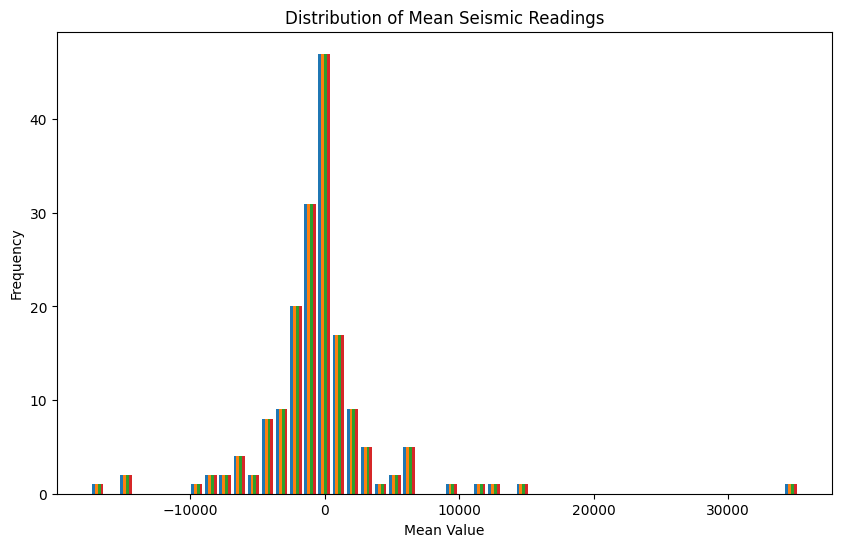

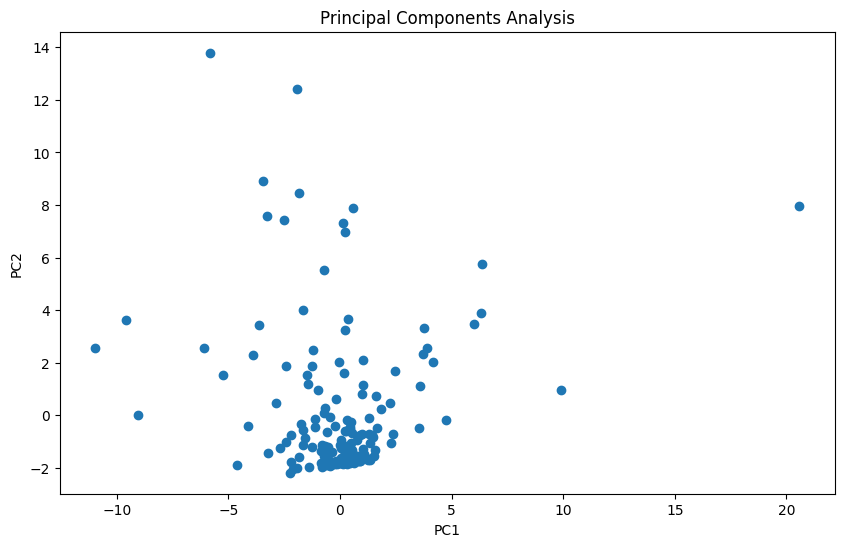

/tmp/ipykernel_36256/993935721.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


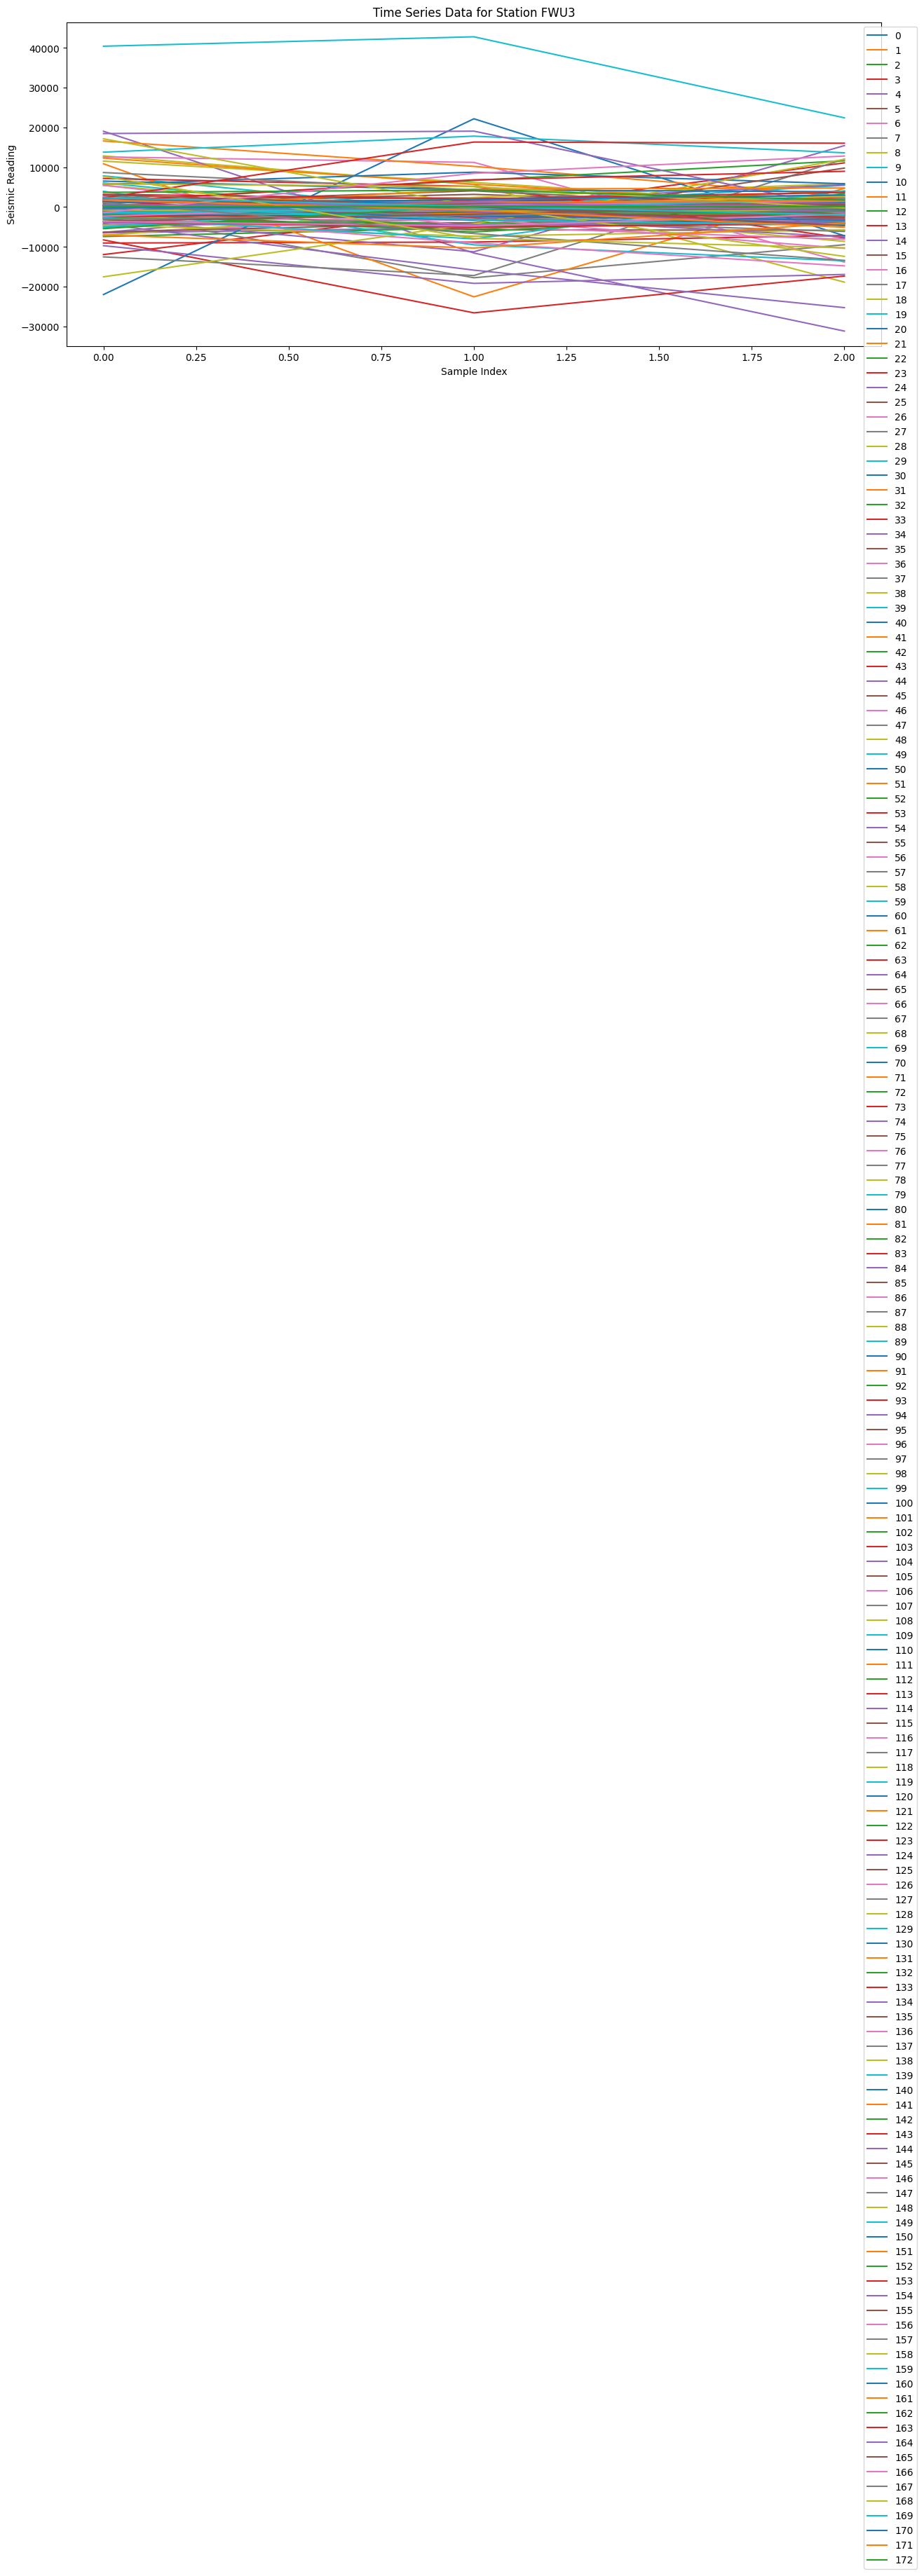

In [12]:
# Function to calculate mean, max, min, and standard deviation of each data array
def analyze_data_array(arr):
    return {
        'mean': np.mean(arr),
        'max': np.max(arr),
        'min': np.min(arr),
        'std_dev': np.std(arr)
    }

# Apply the analysis function to each data array
df_analysis = df['data'].apply(analyze_data_array).apply(pd.Series)

# Add the analysis results to the original dataframe
df = pd.concat([df, df_analysis], axis=1)

# Plot distribution of means
plt.figure(figsize=(10, 6))
plt.hist(df['mean'], bins=50)
plt.title('Distribution of Mean Seismic Readings')
plt.xlabel('Mean Value')
plt.ylabel('Frequency')
plt.show()

# # Perform Fast Fourier Transform (FFT) on a sample dataset
# sample_data = df.iloc[0]['data']
# freq = np.fft.fftfreq(len(sample_data), d=1/250.0)  # Assuming 250 Hz sampling rate
# fft_out = np.abs(np.fft.fft(sample_data))

# plt.figure(figsize=(12, 6))
# plt.plot(freq[:len(freq)//2], fft_out[:len(fft_out)//2])
# plt.title('Frequency Spectrum')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Amplitude')
# plt.show()

# Perform Principal Component Analysis (PCA)
pca = PCA(n_components=2)
scaler = StandardScaler()

# Prepare data for PCA
pca_data = df[['mean', 'max', 'min', 'std_dev']]
scaled_data = scaler.fit_transform(pca_data)

# Apply PCA
principal_components = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.title('Principal Components Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Time series plot of a single station
station_data = df[df['station'] == 'FWU3']
plt.figure(figsize=(15, 6))
for _, row in station_data.iterrows():
    plt.plot(row['data'])
plt.title('Time Series Data for Station FWU3')
plt.xlabel('Sample Index')
plt.ylabel('Seismic Reading')
plt.legend(station_data.index, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Save the processed dataframe
df.to_csv('seismic_data_analysis3.csv', index=False)


<Figure size 1200x600 with 0 Axes>

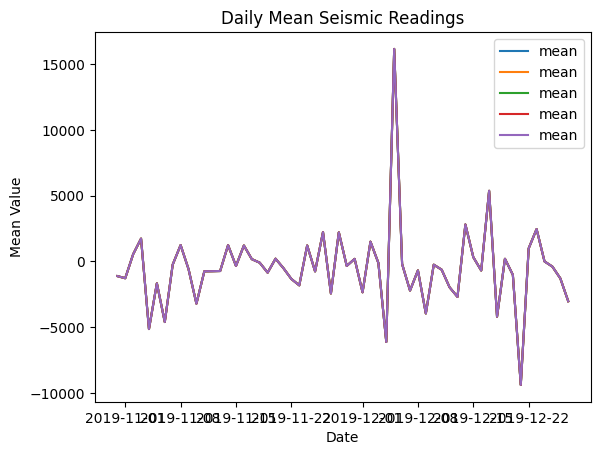

<Figure size 1200x600 with 0 Axes>

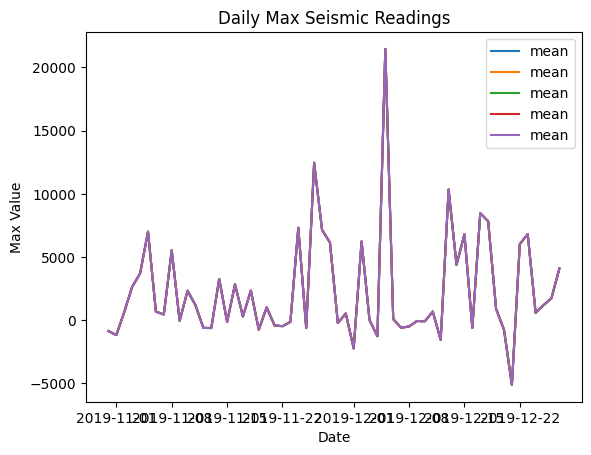

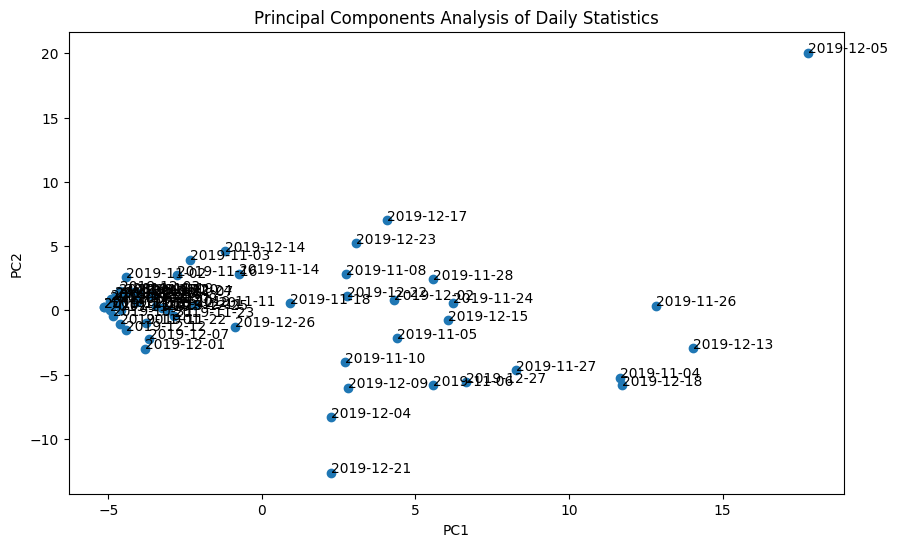

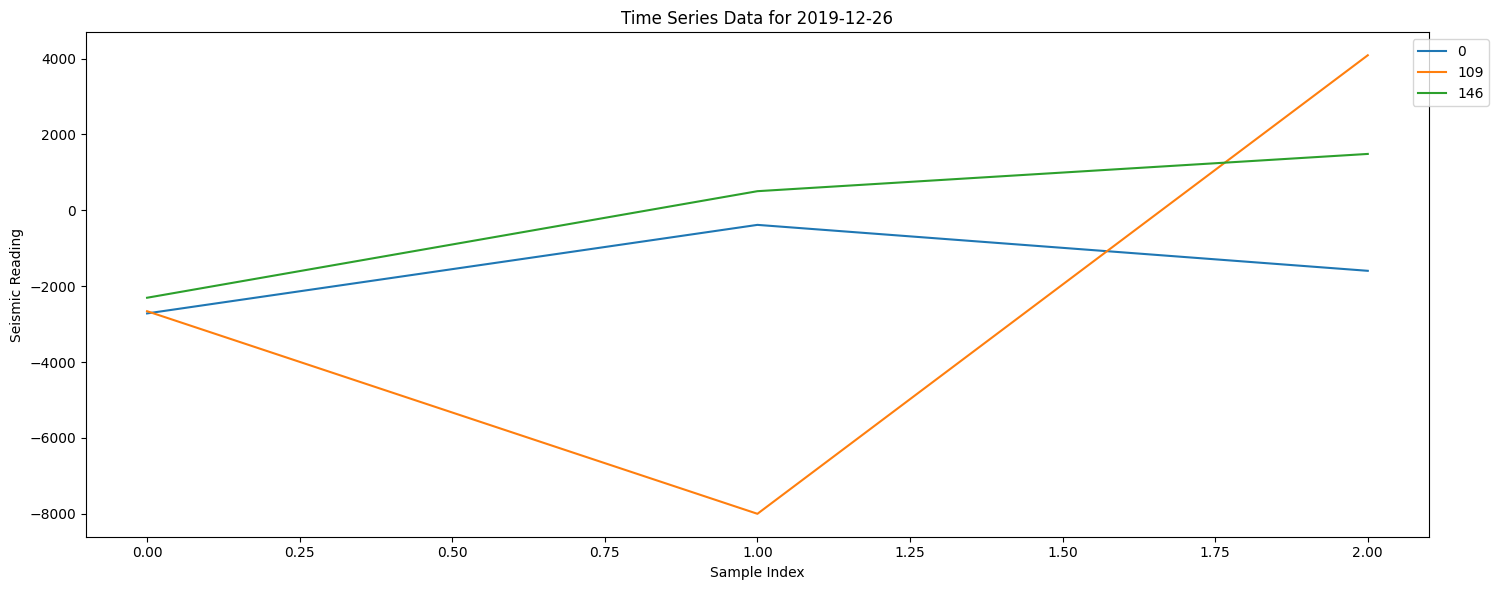

In [13]:

# Convert starttime to datetime and extract the date
df['starttime'] = pd.to_datetime(df['starttime'])
df['date'] = df['starttime'].dt.date

# Function to calculate mean, max, min, and standard deviation of each data array
def analyze_data_array(arr):
    return {
        'mean': np.mean(arr),
        'max': np.max(arr),
        'min': np.min(arr),
        'std_dev': np.std(arr)
    }

# Apply the analysis function to each data array
df_analysis = df['data'].apply(analyze_data_array).apply(pd.Series)

# Add the analysis results to the original dataframe
df = pd.concat([df, df_analysis], axis=1)

# Group by date and calculate daily statistics
daily_stats = df.groupby('date')[['mean', 'max', 'min', 'std_dev']].agg(['mean', 'median', 'std'])

# Plot daily mean values
plt.figure(figsize=(12, 6))
daily_stats['mean']['mean'].plot(kind='line')
plt.title('Daily Mean Seismic Readings')
plt.xlabel('Date')
plt.ylabel('Mean Value')
plt.show()

# Plot daily max values
plt.figure(figsize=(12, 6))
daily_stats['max']['mean'].plot(kind='line')
plt.title('Daily Max Seismic Readings')
plt.xlabel('Date')
plt.ylabel('Max Value')
plt.show()

# # Perform Fast Fourier Transform (FFT) on a sample dataset for each day
# for date, group in df.groupby('date'):
#     sample_data = group.iloc[0]['data']
#     freq = np.fft.fftfreq(len(sample_data), d=1/250.0)  # Assuming 250 Hz sampling rate
#     fft_out = np.abs(np.fft.fft(sample_data))

#     plt.figure(figsize=(12, 6))
#     plt.plot(freq[:len(freq)//2], fft_out[:len(fft_out)//2])
#     plt.title(f'Frequency Spectrum for {date}')
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Amplitude')
#     plt.show()

# Perform Principal Component Analysis (PCA) on daily statistics
pca = PCA(n_components=2)
scaler = StandardScaler()

daily_pca_data = daily_stats.reset_index().drop(columns=['date'])
scaled_data = scaler.fit_transform(daily_pca_data)

principal_components = pca.fit_transform(scaled_data)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1])
for i, date in enumerate(daily_stats.index):
    plt.annotate(date.strftime('%Y-%m-%d'), (principal_components[i, 0], principal_components[i, 1]))
plt.title('Principal Components Analysis of Daily Statistics')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Time series plot of a single day
day_data = df[df['date'] == df['date'].unique()[0]]  # Choose the first day
plt.figure(figsize=(15, 6))
for _, row in day_data.iterrows():
    plt.plot(row['data'])
plt.title(f'Time Series Data for {day_data["date"].iloc[0]}')
plt.xlabel('Sample Index')
plt.ylabel('Seismic Reading')
plt.legend(day_data.index, loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Save the processed dataframe
df.to_csv('seismic_data_analysis.csv', index=False)

Total rows: 173
Rows with valid data: 173
Rows with invalid data: 0

Daily counts of valid data:
          date  is_valid
0   2019-10-31         2
1   2019-11-01         3
2   2019-11-02         3
3   2019-11-03         3
4   2019-11-04         3
5   2019-11-05         3
6   2019-11-06         3
7   2019-11-07         3
8   2019-11-08         3
9   2019-11-09         3
10  2019-11-10         3
11  2019-11-11         3
12  2019-11-12         3
13  2019-11-13         3
14  2019-11-14         3
15  2019-11-15         3
16  2019-11-16         3
17  2019-11-17         3
18  2019-11-18         3
19  2019-11-19         3
20  2019-11-20         3
21  2019-11-21         3
22  2019-11-22         3
23  2019-11-23         3
24  2019-11-24         3
25  2019-11-25         3
26  2019-11-26         3
27  2019-11-27         3
28  2019-11-28         3
29  2019-11-29         3
30  2019-11-30         3
31  2019-12-01         3
32  2019-12-02         3
33  2019-12-03         3
34  2019-12-04         3
35 

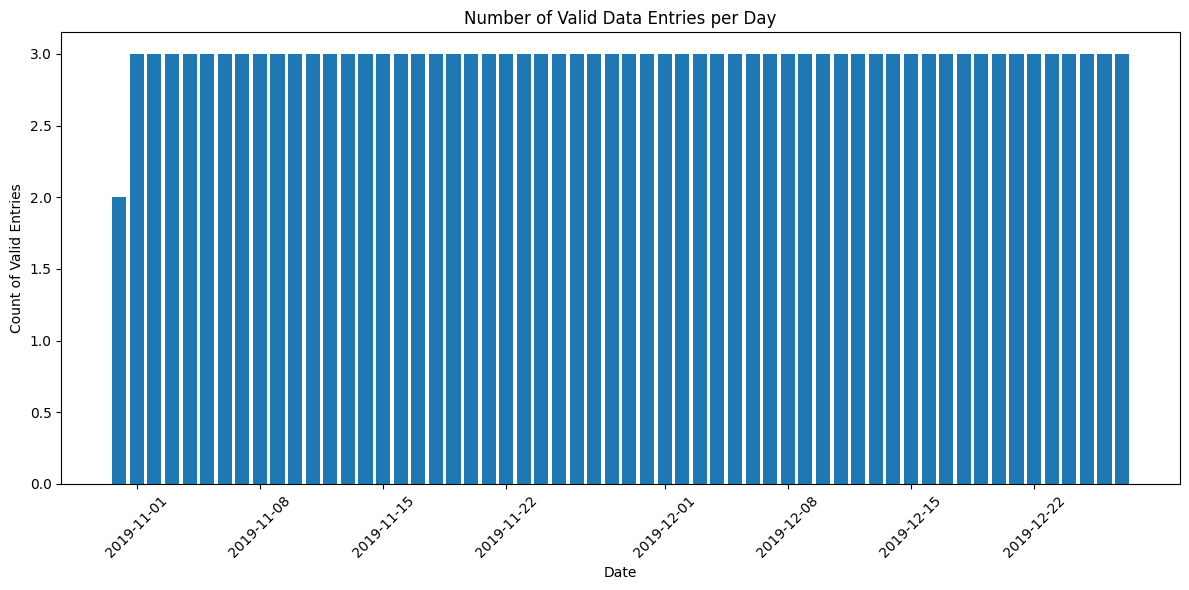


Lengths of valid data arrays:
count    173.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: data, dtype: float64


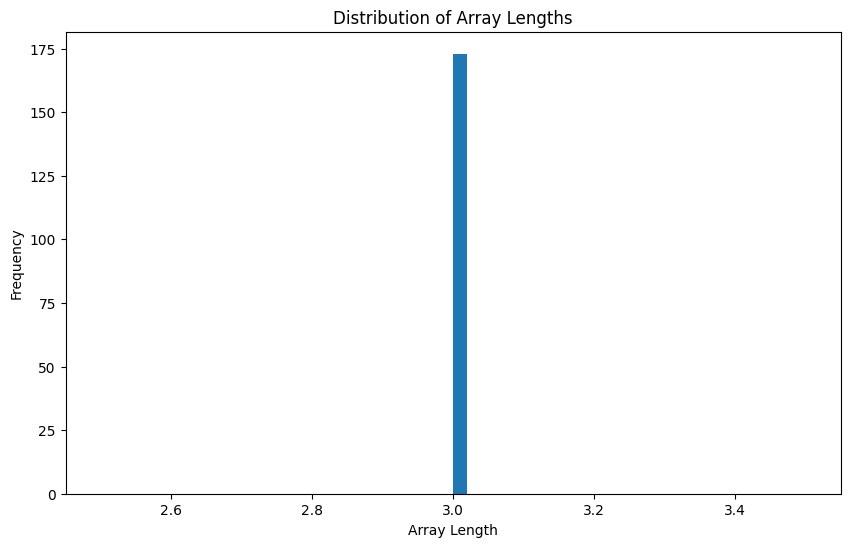


Sampling rates:
sampling_rate
250.0    173
Name: count, dtype: int64


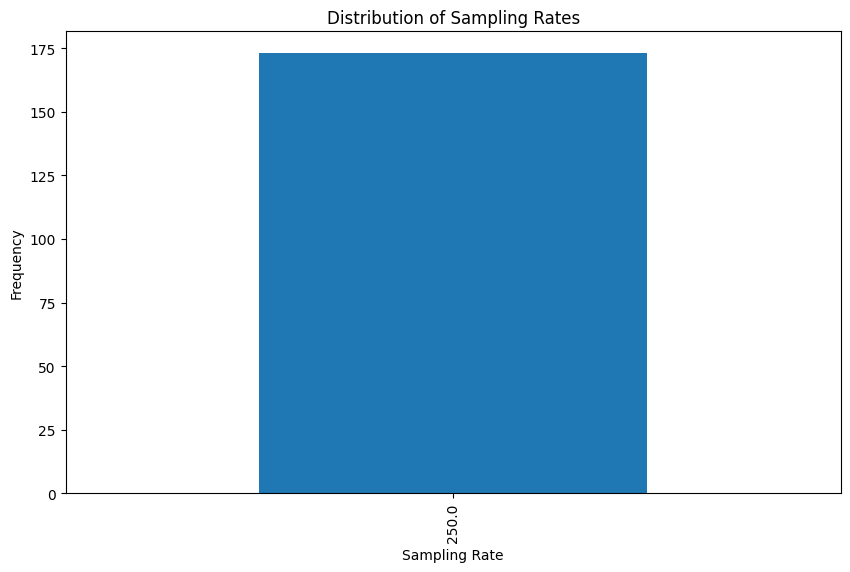


Sample valid arrays:
Date: 2019-12-26, Length: 3
[-2718.  -384. -1595.]

Date: 2019-11-02, Length: 3
[1313. 1352. 1389.]

Date: 2019-12-22, Length: 3
[-7410. -5221.  3344.]

Date: 2019-12-15, Length: 3
[-11938.  -1006.  11098.]

Date: 2019-11-28, Length: 3
[-6507. -5165. -3379.]



In [17]:
# Convert starttime to datetime and extract the date
df['starttime'] = pd.to_datetime(df['starttime'])
df['date'] = df['starttime'].dt.date

# Function to check if data array is valid
def is_valid_array(arr):
    return isinstance(arr, np.ndarray) and len(arr) > 0

# Apply the validity check to each data array
df['is_valid'] = df['data'].apply(is_valid_array)

# Print statistics
print(f"Total rows: {len(df)}")
print(f"Rows with valid data: {df['is_valid'].sum()}")
print(f"Rows with invalid data: {len(df) - df['is_valid'].sum()}")

# Group by date and count valid entries
daily_counts = df.groupby('date')['is_valid'].sum().reset_index()
print("\nDaily counts of valid data:")
print(daily_counts)

# Plot daily counts of valid data
plt.figure(figsize=(12, 6))
plt.bar(daily_counts['date'], daily_counts['is_valid'])
plt.title('Number of Valid Data Entries per Day')
plt.xlabel('Date')
plt.ylabel('Count of Valid Entries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Check the length of data arrays
array_lengths = df[df['is_valid']]['data'].apply(len)
print("\nLengths of valid data arrays:")
print(array_lengths.describe())

# Plot distribution of array lengths
plt.figure(figsize=(10, 6))
plt.hist(array_lengths, bins=50)
plt.title('Distribution of Array Lengths')
plt.xlabel('Array Length')
plt.ylabel('Frequency')
plt.show()

# Check sampling rate distribution
print("\nSampling rates:")
print(df['sampling_rate'].value_counts())

# Plot sampling rates
plt.figure(figsize=(10, 6))
df['sampling_rate'].value_counts().plot(kind='bar')
plt.title('Distribution of Sampling Rates')
plt.xlabel('Sampling Rate')
plt.ylabel('Frequency')
plt.show()

# Print a few sample valid arrays
print("\nSample valid arrays:")
for _, row in df[df['is_valid']].head(5).iterrows():
    print(f"Date: {row['date']}, Length: {len(row['data'])}")
    print(row['data'])
    print()

All data arrays have exactly 3 elements ??? NOPE
The sampling rate is consistently 250 Hz for all records.
There are 173 total records, spread across 57 days  

In [25]:

# Convert starttime to datetime and extract the date
df['starttime'] = pd.to_datetime(df['starttime'])
df['date'] = df['starttime'].dt.date

# Function to convert numpy array to mean and standard deviation
def process_data(data):
    return np.mean(data), np.std(data)

# Apply the function to each row in the 'data' column
df['mean_data'], df['std_data'] = zip(*df['data'].apply(process_data))

# Calculate differences between components
df['diff12'] = df['comp2'] - df['comp1']
df['diff23'] = df['comp3'] - df['comp2']

# Group by date and calculate daily statistics
daily_stats = df.groupby('date')[['mean_data', 'std_data', 'diff12', 'diff23']].agg(['mean', 'std'])

# Plot daily mean values
fig, axes = plt.subplots(3, figsize=(12, 15))
axes[0].plot(daily_stats['mean_data']['mean'])
axes[0].set_title('Daily Mean Values')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Value')

axes[1].plot(daily_stats['std_data']['mean'])
axes[1].set_title('Daily Standard Deviation Values')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Standard Deviation')

axes[2].plot(daily_stats['diff12']['mean'], label='Diff12')
axes[2].plot(daily_stats['diff23']['mean'], label='Diff23')
axes[2].set_title('Daily Differences Between Components')
axes[2].set_xlabel('Date')
axes[2].set_ylabel('Difference')
axes[2].legend()

plt.tight_layout()
plt.show()

# Plot component distributions
fig, axes = plt.subplots(3, figsize=(12, 15))
axes[0].hist(df['comp1'], bins=50)
axes[0].set_title('Distribution of Component 1')
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')

axes[1].hist(df['comp2'], bins=50)
axes[1].set_title('Distribution of Component 2')
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Frequency')

axes[2].hist(df['comp3'], bins=50)
axes[2].set_title('Distribution of Component 3')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Save the processed dataframe
df.to_csv('seismic_data_analysis5.csv', index=False)

KeyError: 'comp2'